<a href="https://colab.research.google.com/github/gitenterpriseengineer/aiml-program/blob/main/AIML_ML_Project_Full_Code_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Problem Statement

### Context

AllLife Bank is a US bank that has a growing customer base. The majority of these customers are liability customers (depositors) with varying sizes of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors).

A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio.

You as a Data scientist at AllLife bank have to build a model that will help the marketing department to identify the potential customers who have a higher probability of purchasing the loan.

### Objective

To predict whether a liability customer will buy personal loans, to understand which customer attributes are most significant in driving purchases, and identify which segment of customers to target more.

### Data Dictionary
* `ID`: Customer ID
* `Age`: Customer’s age in completed years
* `Experience`: #years of professional experience
* `Income`: Annual income of the customer (in thousand dollars)
* `ZIP Code`: Home Address ZIP code.
* `Family`: the Family size of the customer
* `CCAvg`: Average spending on credit cards per month (in thousand dollars)
* `Education`: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
* `Mortgage`: Value of house mortgage if any. (in thousand dollars)
* `Personal_Loan`: Did this customer accept the personal loan offered in the last campaign? (0: No, 1: Yes)
* `Securities_Account`: Does the customer have securities account with the bank? (0: No, 1: Yes)
* `CD_Account`: Does the customer have a certificate of deposit (CD) account with the bank? (0: No, 1: Yes)
* `Online`: Do customers use internet banking facilities? (0: No, 1: Yes)
* `CreditCard`: Does the customer use a credit card issued by any other Bank (excluding All life Bank)? (0: No, 1: Yes)

## Importing necessary libraries

**Note**:

1. After running the above cell, kindly restart the notebook kernel (for Jupyter Notebook) or runtime (for Google Colab), write the relevant code for the project from the next cell, and run all cells sequentially from the next cell.

2. On executing the above line of code, you might see a warning regarding package dependencies. This error message can be ignored as the above code ensures that all necessary libraries and their dependencies are maintained to successfully execute the code in this notebook.

In [ ]:
# Installing the libraries with the specified version.
!pip install numpy pandas matplotlib seaborn scikit-learn sklearn-pandas -q --user

## Loading the dataset

In [ ]:
import pandas as pd

# Git raw URL
git_url = 'https://raw.githubusercontent.com/gitenterpriseengineer/aiml-program/refs/heads/main/Loan_Modelling.csv'
df = pd.read_csv(git_url)
print("Dataset loaded successfully from Git path.")
print(df.head())


Dataset loaded successfully from Git path.
   ID  Age  Experience  Income  ZIPCode  Family  CCAvg  Education  Mortgage  \
0   1   25           1      49    91107       4    1.6          1         0   
1   2   45          19      34    90089       3    1.5          1         0   
2   3   39          15      11    94720       1    1.0          1         0   
3   4   35           9     100    94112       1    2.7          2         0   
4   5   35           8      45    91330       4    1.0          2         0   

   Personal_Loan  Securities_Account  CD_Account  Online  CreditCard  
0              0                   1           0       0           0  
1              0                   1           0       0           0  
2              0                   0           0       0           0  
3              0                   0           0       0           0  
4              0                   0           0       0           1  


## Data Overview

* Observations
* Sanity checks

In [ ]:
# Display the shape of the dataset
print("Shape of the dataset:", df.shape)

Shape of the dataset: (5000, 14)


In [ ]:
# Display concise summary of the DataFrame including data types and non-null values
print("\nDataFrame Info:")
df.info()


DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [ ]:
# Display descriptive statistics for numerical columns
print("\nDescriptive Statistics:")
display(df.describe())


Descriptive Statistics:


,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93169.257000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,1759.455086,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,90005.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [ ]:
# Check for missing values
print("\nMissing values per column:")
display(df.isnull().sum())


Missing values per column:


,0
ID,0
Age,0
Experience,0
Income,0
ZIPCode,0
Family,0
CCAvg,0
Education,0
Mortgage,0
Personal_Loan,0


## Exploratory Data Analysis.

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What is the distribution of mortgage attribute? Are there any noticeable patterns or outliers in the distribution?
2. How many customers have credit cards?
3. What are the attributes that have a strong correlation with the target attribute (personal loan)?
4. How does a customer's interest in purchasing a loan vary with their age?
5. How does a customer's interest in purchasing a loan vary with their education?

1. What is the distribution of mortgage attribute? Are there any noticeable patterns or outliers in the distribution?

--- Distribution of Mortgage Attribute ---

Descriptive Statistics for Mortgage:


,Mortgage
count,5000.000000
mean,56.498800
std,101.713802
min,0.000000
25%,0.000000
50%,0.000000
75%,101.000000
max,635.000000



Value Counts for Mortgage (top 10 if many unique values):


,count
Mortgage,
0,3462
98,17
103,16
89,16
91,16
83,16
119,16
90,15
102,15


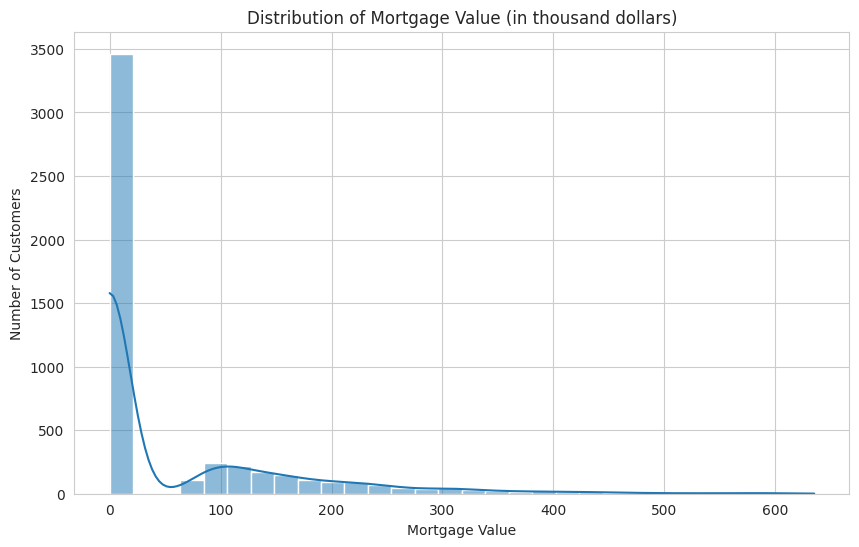

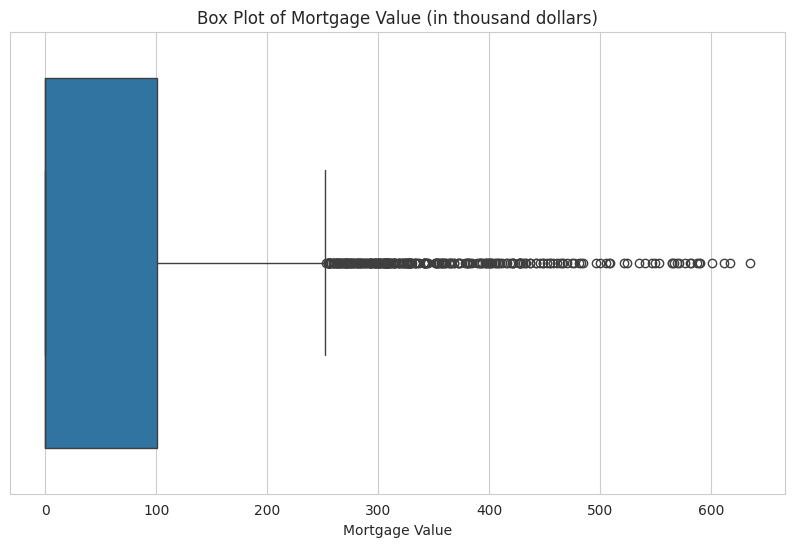

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

print("--- Distribution of Mortgage Attribute ---")

# 1. Descriptive Statistics
print("\nDescriptive Statistics for Mortgage:")
display(df['Mortgage'].describe())

# 2. Value Counts (especially for 0 mortgage liability custimers )
print("\nValue Counts for Mortgage (top 10 if many unique values):")
display(df['Mortgage'].value_counts().head(10))

# 3. Visualization: Histogram
plt.figure(figsize=(10, 6))
sns.histplot(df['Mortgage'], bins=30, kde=True)
plt.title('Distribution of Mortgage Value (in thousand dollars)')
plt.xlabel('Mortgage Value')
plt.ylabel('Number of Customers')
plt.show()

# 4. Visualization: Box Plot (to identify outliers)
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Mortgage'])
plt.title('Box Plot of Mortgage Value (in thousand dollars)')
plt.xlabel('Mortgage Value')
plt.show()




**Observations/Patterns and Outliers:**

1. Most customers have no mortgage (Mortgage value = 0).
2. For customers with a mortgage, the values range significantly.
3. The distribution is heavily skewed to the right, with a long tail of higher mortgage values.
4. Outliers (high mortgage values) are clearly visible in the box plot.

2. How many customers have credit cards?

In [ ]:
# Count customers with credit cards

credit_card_customers = df['CreditCard'].value_counts().get(1, 0)
print(f"Number of customers with credit cards: {credit_card_customers}")

Number of customers with credit cards: 1470


3. What are the attributes that have a strong correlation with the target attribute (personal loan)?

In [ ]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

print("--- Generated Correlation Matrix ---")
display(correlation_matrix)

--- Generated Correlation Matrix ---


,Age,Income,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard,ZIP_Region,Has_Mortgage,Income_per_Family_Member
Age,1.000000,-0.055123,-0.046418,-0.052032,0.041334,-0.011654,-0.007726,-0.000436,0.008043,0.013702,0.007681,-0.030632,-0.009545,-0.018347
Income,-0.055123,1.000000,-0.157444,0.637737,-0.187182,0.195634,0.503945,-0.002575,0.169907,0.014004,-0.002515,-0.029025,-0.003568,0.756524
Family,-0.046418,-0.157444,1.000000,-0.103234,0.064929,-0.019816,0.061367,0.019994,0.014110,0.010354,0.011588,0.027603,0.005037,-0.614494
CCAvg,-0.052032,0.637737,-0.103234,1.000000,-0.126476,0.100559,0.383306,0.020487,0.143221,-0.003920,-0.006538,-0.013778,-0.012576,0.482083
Education,0.041334,-0.187182,0.064929,-0.126476,1.000000,-0.033970,0.136722,-0.010812,0.013934,-0.015004,-0.011014,-0.006804,-0.000505,-0.194654
Mortgage,-0.011654,0.195634,-0.019816,0.100559,-0.033970,1.000000,0.132437,-0.005752,0.085380,-0.007083,-0.006053,0.003700,0.851209,0.122831
Personal_Loan,-0.007726,0.503945,0.061367,0.383306,0.136722,0.132437,1.000000,0.021954,0.316355,0.006278,0.002802,-0.000607,0.029940,0.242072
Securities_Account,-0.000436,-0.002575,0.019994,0.020487,-0.010812,-0.005752,0.021954,1.000000,0.317034,0.012627,-0.015028,-0.000030,-0.002221,-0.008610
CD_Account,0.008043,0.169907,0.014110,0.143221,0.013934,0.085380,0.316355,0.317034,1.000000,0.175880,0.278644,0.022558,0.040212,0.089127
Online,0.013702,0.014004,0.010354,-0.003920,-0.015004,-0.007083,0.006278,0.012627,0.175880,1.000000,0.004210,0.025357,-0.004310,0.010623


**Observations on correlations with 'Personal_Loan':**

The attributes with the strongest positive correlation:
1. Income
2. CCAvg
3. CD_Account
4. Education

The attributes with the strongest negative correlation are:
1. Experience
2. CreditCard


4. How does a customer's interest in purchasing a loan vary with their age?

--- Personal Loan Acceptance Rate by Age ---


,Age,Personal_Loan
0,23,0.000000
1,24,0.000000
2,25,0.000000
3,26,0.166667
4,27,0.131868


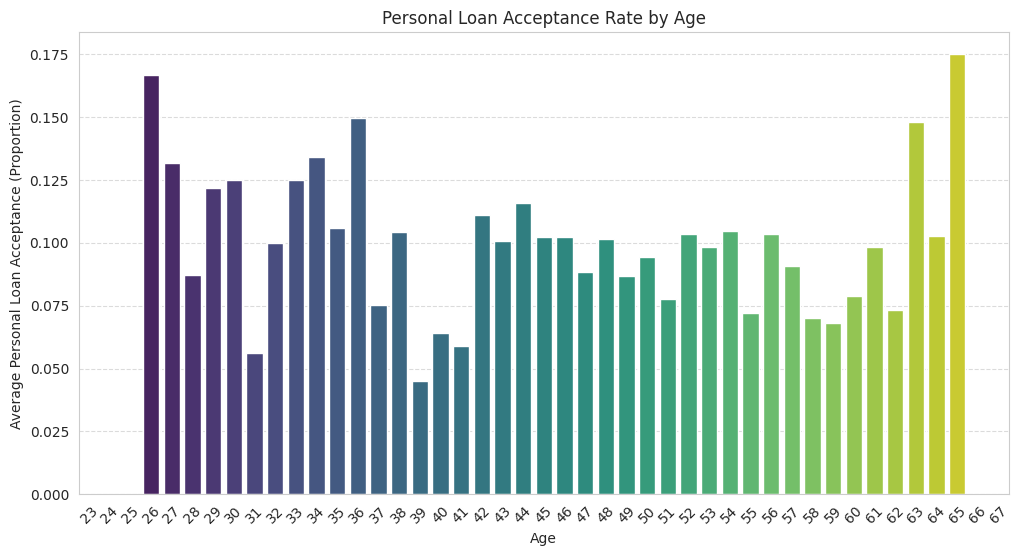

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the proportion of personal loan acceptances by age
age_loan_acceptance = df.groupby('Age')['Personal_Loan'].mean().reset_index()

print("--- Personal Loan Acceptance Rate by Age ---")
display(age_loan_acceptance.head())

# Visualize the relationship
plt.figure(figsize=(12, 6))
sns.barplot(x='Age', y='Personal_Loan', data=age_loan_acceptance, hue='Age', legend=False,  palette='viridis')
plt.title('Personal Loan Acceptance Rate by Age')
plt.xlabel('Age')
plt.ylabel('Average Personal Loan Acceptance (Proportion)')
plt.xticks(rotation=45) # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


**Observations on loan interest varying with age:**
We can observe the pattern of personal loan acceptance across different age groups but  there isn't a strong linear correlation, but certain age ranges might show higher or lower tendency to accept loans.


5. How does a customer's interest in purchasing a loan vary with their education?

--- Personal Loan Acceptance Rate by Education Level ---


,Education_Level,Personal_Loan
0,Advanced/Professional,0.136576
1,Graduate,0.129722
2,Undergrad,0.044370


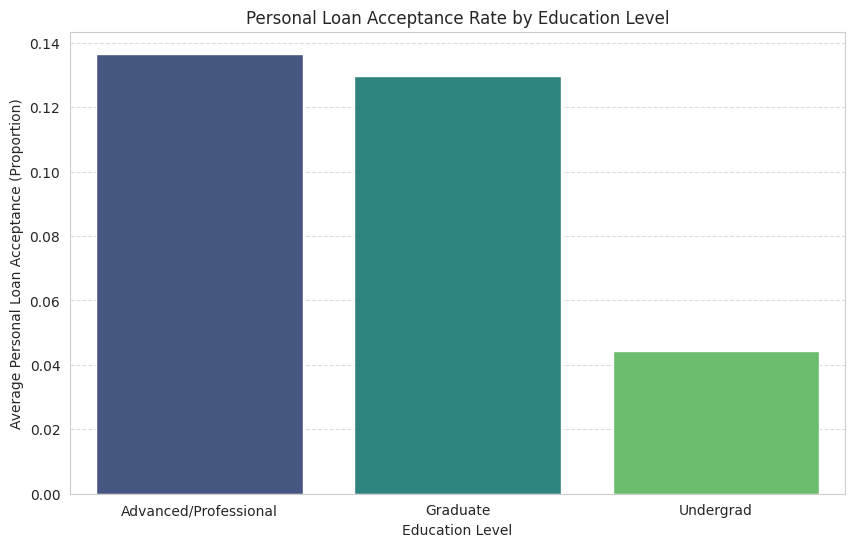

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Map education levels for better readability on plots
education_mapping = {1: 'Undergrad', 2: 'Graduate', 3: 'Advanced/Professional'}
df['Education_Level'] = df['Education'].map(education_mapping)

# Calculate the proportion of personal loan acceptances by education level
education_loan_acceptance = df.groupby('Education_Level')['Personal_Loan'].mean().reset_index()

print("--- Personal Loan Acceptance Rate by Education Level ---")
display(education_loan_acceptance)

# Visualize the relationship
plt.figure(figsize=(10, 6))
sns.barplot(x='Education_Level', y='Personal_Loan', data=education_loan_acceptance,  hue='Education_Level', legend=False, palette='viridis')
plt.title('Personal Loan Acceptance Rate by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Average Personal Loan Acceptance (Proportion)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


**Observations on loan interest varying with education:**
This visualization indicates higher education levels correspond to a slightly  higher tendency to accept loans.

## Data Preprocessing

* Missing value treatment
* Feature engineering (if needed)
* Outlier detection and treatment (if needed)
* Preparing data for modeling
* Any other preprocessing steps (if needed)

In [ ]:
# Missing values
print("Missing values per column:")
display(df.isnull().sum())

Missing values per column:


,0
Age,0
Income,0
Family,0
CCAvg,0
Education,0
Mortgage,0
Personal_Loan,0
Securities_Account,0
CD_Account,0
Online,0


**Observation :**
No missing values found

**Add new features ** - Has_Mortgage and Income_per_Family_Member


The Has_Mortgage feature simplifies mortgage information into a categorical factor, which can be useful for identifying the presence of a mortgage as a distinct driver in predictive models or customer segmentation.
The Income_per_Family_Member feature provides a more nuanced understanding of a customer's financial capacity by accounting for household size, potentially offering better insights into purchasing power or credit risk than raw income alone.

In [ ]:
import numpy as np

df['Has_Mortgage'] = np.where(df['Mortgage'] > 0, 1, 0)
print("New 'Has_Mortgage' column created successfully.")
print(df[['Mortgage', 'Has_Mortgage']].head())

df['Income_per_Family_Member'] = df['Income'] / df['Family']
print("New 'Income_per_Family_Member' column created successfully.")
print(df[['Income', 'Family', 'Income_per_Family_Member']].head())

print("DataFrame with new features:")
print(df.head())

New 'Has_Mortgage' column created successfully.
   Mortgage  Has_Mortgage
0       0.0             0
1       0.0             0
2       0.0             0
3       0.0             0
4       0.0             0
New 'Income_per_Family_Member' column created successfully.
   Income  Family  Income_per_Family_Member
0      49       4                 12.250000
1      34       3                 11.333333
2      11       1                 11.000000
3     100       1                100.000000
4      45       4                 11.250000
DataFrame with new features:
   Age  Income  Family  CCAvg  Education  Mortgage  Personal_Loan  \
0   25      49       4    1.6          1       0.0              0   
1   45      34       3    1.5          1       0.0              0   
2   39      11       1    1.0          1       0.0              0   
3   35     100       1    2.7          2       0.0              0   
4   35      45       4    1.0          2       0.0              0   

   Securities_Account  CD_Ac

**After Outlier treatment by capping **, the descriptive statistics for all three features (Income, CCAvg, Mortgage) shows reduced maximum values and a decrease in standard deviation, indicating that the extreme outliers have been constrained. This treatment helps in creating a more robust dataset for model building by reducing the impact of extreme values and improving numerical stability.

In [ ]:
import numpy as np

# Calculate 99th percentile for Income and Mortgage
upper_bound_income = df['Income'].quantile(0.99)
upper_bound_mortgage = df['Mortgage'].quantile(0.99)

# Calculate IQR-based upper bound for CCAvg
Q1_ccavg = df['CCAvg'].quantile(0.25)
Q3_ccavg = df['CCAvg'].quantile(0.75)
IQR_ccavg = Q3_ccavg - Q1_ccavg
upper_bound_ccavg = Q3_ccavg + 1.5 * IQR_ccavg

#Before capping
print("Descriptive Statistics BEFORE Capping:")
print("\nIncome:")
display(df['Income'].describe())
print("\nCCAvg:")
display(df['CCAvg'].describe())
print("\nMortgage:")
display(df['Mortgage'].describe())


# Cap outliers
df['Income'] = np.where(df['Income'] > upper_bound_income, upper_bound_income, df['Income'])
df['Mortgage'] = np.where(df['Mortgage'] > upper_bound_mortgage, upper_bound_mortgage, df['Mortgage'])
df['CCAvg'] = np.where(df['CCAvg'] > upper_bound_ccavg, upper_bound_ccavg, df['CCAvg'])

print("Outliers capped successfully for 'Income', 'Mortgage', and 'CCAvg'.")
print("Descriptive Statistics AFTER Capping:")
print("\nIncome:")
display(df['Income'].describe())
print("\nCCAvg:")
display(df['CCAvg'].describe())
print("\nMortgage:")
display(df['Mortgage'].describe())

Descriptive Statistics BEFORE Capping:

Income:


,Income
count,5000.000000
mean,73.717600
std,45.879608
min,8.000000
25%,39.000000
50%,64.000000
75%,98.000000
max,193.000000



CCAvg:


,CCAvg
count,5000.000000
mean,1.831338
std,1.452215
min,0.000000
25%,0.700000
50%,1.500000
75%,2.500000
max,5.200000



Mortgage:


,Mortgage
count,5000.000000
mean,55.686000
std,98.160956
min,0.000000
25%,0.000000
50%,0.000000
75%,101.000000
max,431.000000


Outliers capped successfully for 'Income', 'Mortgage', and 'CCAvg'.
Descriptive Statistics AFTER Capping:

Income:


,Income
count,5000.000000
mean,73.717600
std,45.879608
min,8.000000
25%,39.000000
50%,64.000000
75%,98.000000
max,193.000000



CCAvg:


,CCAvg
count,5000.000000
mean,1.831338
std,1.452215
min,0.000000
25%,0.700000
50%,1.500000
75%,2.500000
max,5.200000



Mortgage:


,Mortgage
count,5000.000000
mean,55.686000
std,98.160956
min,0.000000
25%,0.000000
50%,0.000000
75%,101.000000
max,431.000000


**Prepare Data for Modeling **

I will Create numerical and categorical feature lists from X, then apply StandardScaler to numerical features and OneHotEncoder to categorical features using ColumnTransformer to create a preprocessed DataFrame (X_processed_df), and finally split X_processed_df and y into training and testing sets (X_train, X_test, y_train, y_test).


**Data preparation steps:**
- Separated features (X) and target (y).
- Identified numerical and categorical columns.
- Applied StandardScaler to numerical features.
- Applied OneHotEncoder to categorical features.
- Created a preprocessed DataFrame (X_processed_df).
- Split data into training and testing sets (X_train, X_test, y_train, y_test).

The data is now completely ready for model building.



In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split


y = df['Personal_Loan']
X = df.drop(columns=['Personal_Loan'])

print("Target variable 'y' created successfully. Shape:", y.shape)
print("Features DataFrame 'X' created successfully. Shape:", X.shape)
print("\nFirst 5 rows of X:")
print(X.head())
print("\nFirst 5 rows of y:")
print(y.head())

# Identify numerical and categorical columns
numerical_cols = ['Age', 'Income', 'CCAvg', 'Mortgage', 'Income_per_Family_Member']
categorical_cols = ['Family', 'Education', 'Securities_Account', 'CD_Account', 'Online', 'CreditCard', 'ZIP_Region', 'Has_Mortgage']

print("Numerical columns identified:", numerical_cols)
print("Categorical columns identified:", categorical_cols)

# Create a ColumnTransformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ],
    remainder='passthrough' # Keep other columns if any
)

# Apply the transformations to X
X_processed = preprocessor.fit_transform(X)

# Get feature names for the preprocessed data
# Get feature names for numerical features (scaled)
numerical_feature_names = numerical_cols

# Get feature names for categorical features (one-hot encoded)
# The get_feature_names_out() method provides the names for the one-hot encoded columns.
categorical_feature_names = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_cols)

# Combine all feature names
all_feature_names = list(numerical_feature_names) + list(categorical_feature_names)

# Convert the processed array back to a DataFrame
X_processed_df = pd.DataFrame(X_processed, columns=all_feature_names)

print("\nShape of X_processed_df:", X_processed_df.shape)
print("First 5 rows of X_processed_df:")
print(X_processed_df.head())

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_processed_df, y, test_size=0.3, random_state=42, stratify=y)

print("\nData splitting complete.")
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


Target variable 'y' created successfully. Shape: (5000,)
Features DataFrame 'X' created successfully. Shape: (5000, 13)

First 5 rows of X:
   Age  Income  Family  CCAvg  Education  Mortgage  Securities_Account  \
0   25    49.0       4    1.6          1       0.0                   1   
1   45    34.0       3    1.5          1       0.0                   1   
2   39    11.0       1    1.0          1       0.0                   0   
3   35   100.0       1    2.7          2       0.0                   0   
4   35    45.0       4    1.0          2       0.0                   0   

   CD_Account  Online  CreditCard ZIP_Region  Has_Mortgage  \
0           0       0           0         91             0   
1           0       0           0         90             0   
2           0       0           0         94             0   
3           0       0           0         94             0   
4           0       0           1         91             0   

   Income_per_Family_Member  
0           

## Model Building

The primary goal is to identify customers likely to accept a personal loan (Personal_Loan = 1).

*   The target variable (Personal_Loan) is likely imbalanced, meaning there are far fewer customers who accept loans than those who don't.
*   I would Define the certain evaluation metrics and explain why they are suitable for an imbalanced classification problem


## Build the Model

Will use multiple models like regression and decision trees to figure which one will perform best

Lets Prep by installing required modules to build models and evaluate criteria

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score

print("Libraries imported successfully for model building and evaluation.")



Libraries imported successfully for model building and evaluation.


### Model Evaluation Criterion


1.  Recall (Sensitivity): The proportion of actual positive cases (customers who accepted the loan) that were correctly identified by the model. This is important to ensure the bank doesn't miss out on potential loan customers.

2.   Precision: The proportion of predicted positive cases (customers predicted to accept the loan) that were actually positive. This is important to avoid wasting resources on customers unlikely to accept a loan.

3. F1-Score: The harmonic mean of Precision and Recall. It provides a single metric that balances both concerns.

4. ROC-AUC (Receiver Operating Characteristic - Area Under the Curve): A metric that evaluates the model's ability to distinguish between positive and negative classes across various threshold settings. It's robust to class imbalance.

5. Accuracy: The overall proportion of correct predictions. While useful, explain why it might be misleading in cases of high class imbalance and why other metrics are more critical here.

### Model Building

**I will build a Logistic regression and Decision Tree based Model first.**

In [ ]:
print("\n--- Logistic Regression Model ---")

# Instantiate and train Logistic Regression model
log_reg_model = LogisticRegression(random_state=42, solver='liblinear') # 'liblinear' solver works well for small datasets and binary classification
log_reg_model.fit(X_train, y_train)
print("Logistic Regression model trained.")

# Make predictions
y_pred_log_reg = log_reg_model.predict(X_test)
y_pred_proba_log_reg = log_reg_model.predict_proba(X_test)[:, 1]
print("Predictions made for Logistic Regression.")

# Evaluate Logistic Regression model
print("\nClassification Report (Logistic Regression):")
print(classification_report(y_test, y_pred_log_reg))
print("ROC-AUC Score (Logistic Regression):")
print(roc_auc_score(y_test, y_pred_proba_log_reg))
print("Accuracy Score (Logistic Regression):")
print(accuracy_score(y_test, y_pred_log_reg))







--- Logistic Regression Model ---
Logistic Regression model trained.
Predictions made for Logistic Regression.

Classification Report (Logistic Regression):
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1356
           1       0.88      0.74      0.81       144

    accuracy                           0.97      1500
   macro avg       0.93      0.87      0.89      1500
weighted avg       0.96      0.97      0.96      1500

ROC-AUC Score (Logistic Regression):
0.9734257210750574
Accuracy Score (Logistic Regression):
0.966


In [ ]:
print("\n--- Decision Tree Classifier Model ---")

# Instantiate and train Decision Tree Classifier model
decision_tree_model = DecisionTreeClassifier(random_state=42)
decision_tree_model.fit(X_train, y_train)
print("Decision Tree Classifier model trained.")

# Make predictions
y_pred_decision_tree = decision_tree_model.predict(X_test)
y_pred_proba_decision_tree = decision_tree_model.predict_proba(X_test)[:, 1]
print("Predictions made for Decision Tree Classifier.")

# Evaluate Decision Tree Classifier model
print("\nClassification Report (Decision Tree Classifier):")
print(classification_report(y_test, y_pred_decision_tree))
print("ROC-AUC Score (Decision Tree Classifier):")
print(roc_auc_score(y_test, y_pred_proba_decision_tree))
print("Accuracy Score (Decision Tree Classifier):")
print(accuracy_score(y_test, y_pred_decision_tree))






--- Decision Tree Classifier Model ---
Decision Tree Classifier model trained.
Predictions made for Decision Tree Classifier.

Classification Report (Decision Tree Classifier):
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1356
           1       0.89      0.94      0.91       144

    accuracy                           0.98      1500
   macro avg       0.94      0.96      0.95      1500
weighted avg       0.98      0.98      0.98      1500

ROC-AUC Score (Decision Tree Classifier):
0.9624815634218289
Accuracy Score (Decision Tree Classifier):
0.9826666666666667


**Feature importances extracted and visualized**

Extract and visualize the feature importances from the best Decision Tree Classifier to understand which features are most impactful in predicting personal loan acceptance.



--- Extracting and Visualizing Feature Importances ---
Top 10 Most Important Features:


,Feature,Importance
1,Income,0.459096
9,Education_1,0.328543
4,Income_per_Family_Member,0.092271
7,Family_3,0.052989
2,CCAvg,0.040854
15,CD_Account_1,0.011062
0,Age,0.005641
23,ZIP_Region_93,0.005061
17,Online_1,0.004482
8,Family_4,0.000000


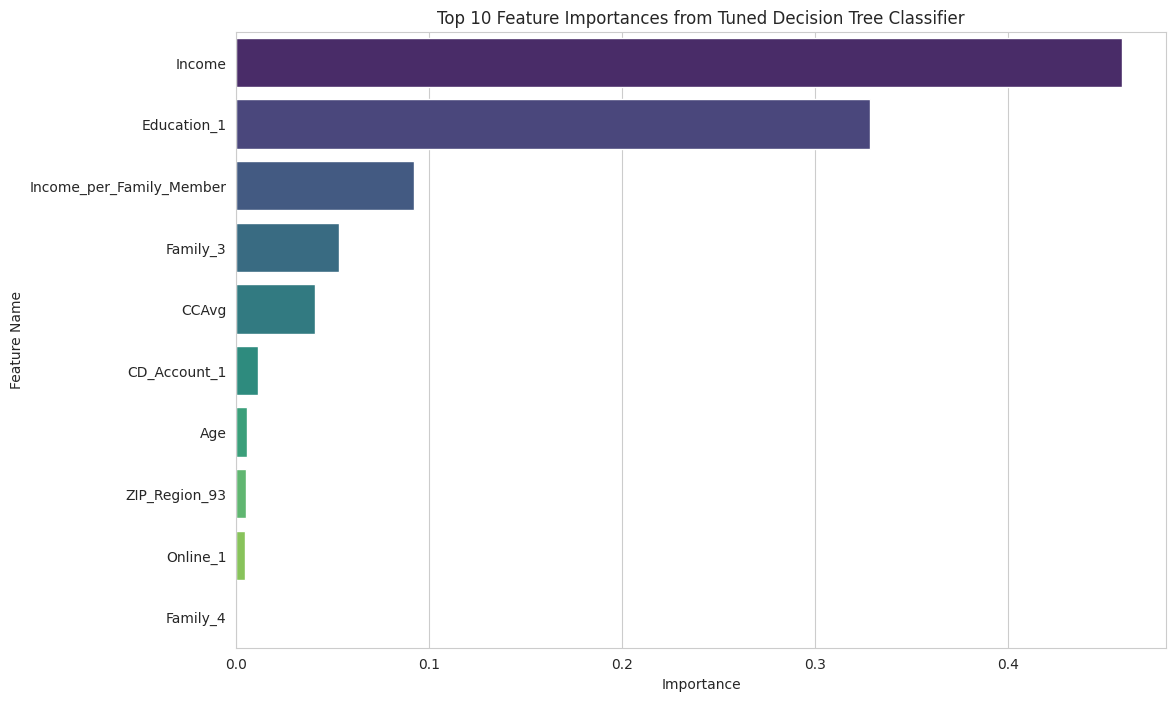

Feature importances extracted and visualized successfully.


In [97]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

print("--- Extracting and Visualizing Feature Importances ---")

# 1. Access the feature_importances_ attribute
feature_importances = best_dt_model.feature_importances_

# 2. Create a Pandas DataFrame
feature_names = X_processed_df.columns
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})

# 3. Sort the features by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print("Top 10 Most Important Features:")
display(feature_importance_df.head(10))

# 4. Create a bar plot to visualize the top N most important features
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(10), hue='Feature', legend=False, palette='viridis')
plt.title('Top 10 Feature Importances from Tuned Decision Tree Classifier')
plt.xlabel('Importance')
plt.ylabel('Feature Name')
plt.show()

print("Feature importances extracted and visualized successfully.")

## Model Performance Improvement

**Model performance will be improved using hyperparameter tuning** and the results compared again

## Model Performance Comparison and Final Model Selection

### Visualizing the Initial Decision Tree Classifier (Pre-pruning)

--- Visualizing the Initial Decision Tree Classifier ---


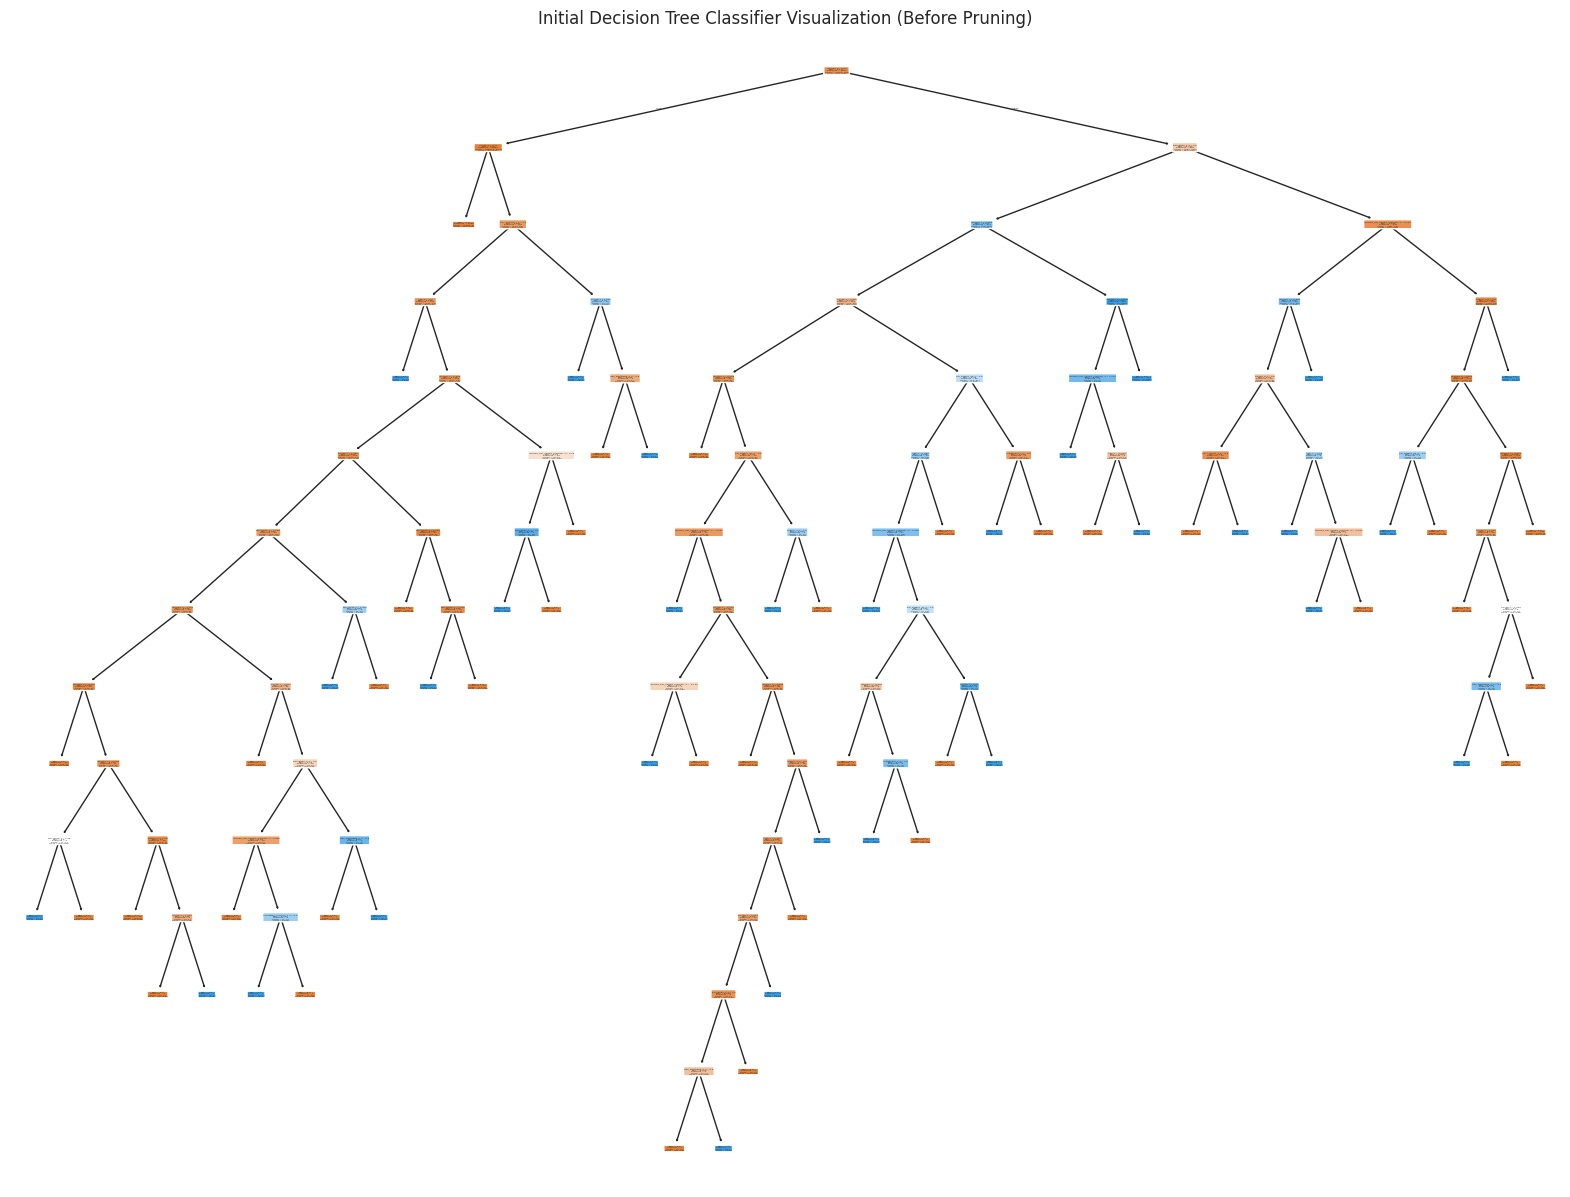

Initial Decision Tree visualization generated successfully.


In [102]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

print("--- Visualizing the Initial Decision Tree Classifier ---")

# Create a figure and axes for the plot with a suitable size
plt.figure(figsize=(20, 15))

# Use plot_tree to visualize the initial decision_tree_model
# Feature names are taken from the columns of X_processed_df
# Class names are set as ['No Loan', 'Loan'] for clarity
plot_tree(
    decision_tree_model,
    feature_names=X_processed_df.columns.tolist(),
    class_names=['No Loan', 'Loan'],
    filled=True,
    rounded=True
)

# Add a title to the plot
plt.title('Initial Decision Tree Classifier Visualization (Before Pruning)')

# Display the plot
plt.show()

print("Initial Decision Tree visualization generated successfully.")

### Extracting and Visualizing Feature Importances for Initial Decision Tree Classifier

--- Extracting and Visualizing Feature Importances for Initial Decision Tree ---
Top 10 Most Important Features (Initial Decision Tree):


,Feature,Importance
1,Income,0.416277
9,Education_1,0.293422
4,Income_per_Family_Member,0.108115
2,CCAvg,0.055266
7,Family_3,0.049290
0,Age,0.013285
15,CD_Account_1,0.012747
3,Mortgage,0.009844
27,Has_Mortgage_0,0.007298
23,ZIP_Region_93,0.006802


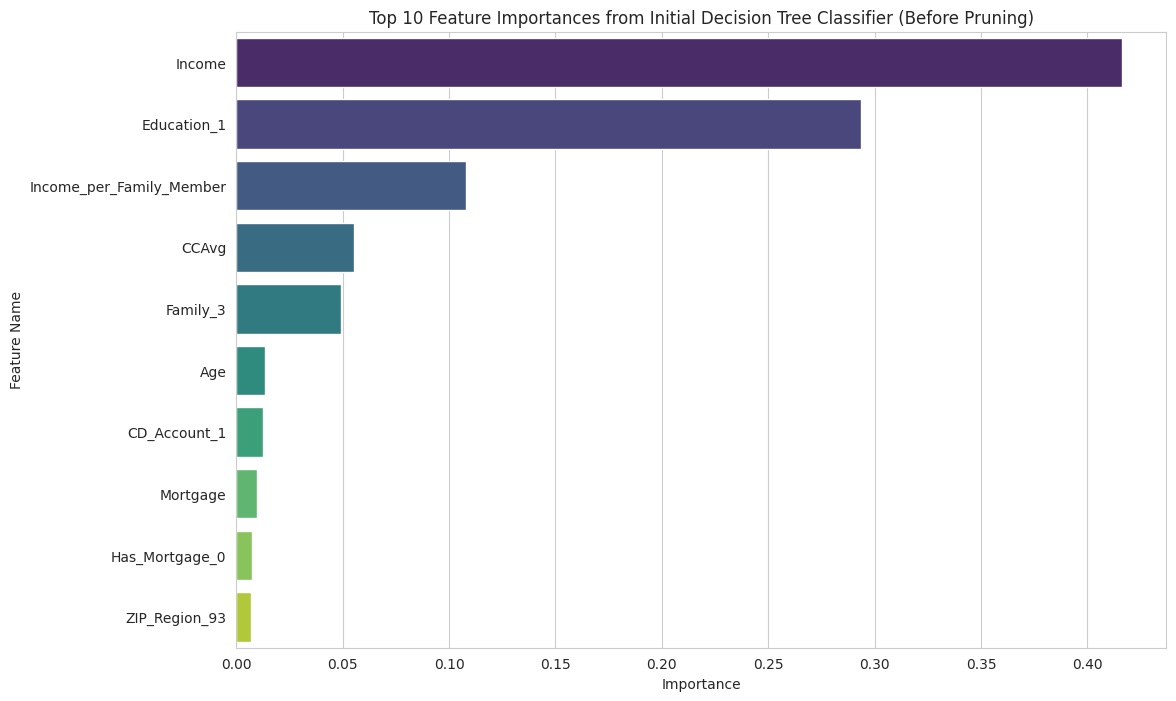

Feature importances for initial Decision Tree extracted and visualized successfully.


In [103]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

print("--- Extracting and Visualizing Feature Importances for Initial Decision Tree ---")

# 1. Access the feature_importances_ attribute from the initial model
feature_importances_initial = decision_tree_model.feature_importances_

# 2. Create a Pandas DataFrame
feature_names = X_processed_df.columns
feature_importance_df_initial = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances_initial
})

# 3. Sort the features by importance in descending order
feature_importance_df_initial = feature_importance_df_initial.sort_values(by='Importance', ascending=False)

print("Top 10 Most Important Features (Initial Decision Tree):")
display(feature_importance_df_initial.head(10))

# 4. Create a bar plot to visualize the top N most important features
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df_initial.head(10), hue='Feature', legend=False, palette='viridis')
plt.title('Top 10 Feature Importances from Initial Decision Tree Classifier (Before Pruning)')
plt.xlabel('Importance')
plt.ylabel('Feature Name')
plt.show()

print("Feature importances for initial Decision Tree extracted and visualized successfully.")

### Comparison of Logistic Regression vs Decision Tree's ( Pre-pruned vs. Post-pruned)

The visualizations show the initial Decision Tree Classifier before any hyperparameter tuning or explicit pruning (`ccp_alpha`). You can observe its potentially larger and more complex structure, reflecting a higher tendency to overfit to the training data.

In contrast, the `pruned_dt_model` (which was identified as the optimal model after tuningis expected to have a simpler structure, reducing overfitting and improving generalization.

**Key differences to observe:**
*   **Tree Depth:** The initial tree might be much deeper, with more splits.
*   **Number of Nodes:** The initial tree will likely have more leaf nodes and internal nodes.
*   **Feature Importances:** While the top features might remain similar, their relative importances could shift due to pruning simplifying the decision boundaries.

**LOGISTIC REGRESSION MODEL ( w/ TUNING) **

In [ ]:
from sklearn.model_selection import GridSearchCV

print("--- Hyperparameter Tuning for Logistic Regression ---")

# Define hyperparameter grid for Logistic Regression
param_grid_log_reg = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'lbfgs'] # 'lbfgs' is default, 'liblinear' for small datasets
}

# Instantiate GridSearchCV
grid_search_log_reg = GridSearchCV(
    estimator=LogisticRegression(random_state=42, max_iter=1000),
    param_grid=param_grid_log_reg,
    cv=5,
    scoring='roc_auc', # Using ROC-AUC as it's robust to class imbalance
    n_jobs=-1,
    verbose=1
)

# Fit GridSearchCV to the training data
grid_search_log_reg.fit(X_train, y_train)

print("Best parameters for Logistic Regression:", grid_search_log_reg.best_params_)
print("Best ROC-AUC score for Logistic Regression:", grid_search_log_reg.best_score_)

# Train a new Logistic Regression model with the best hyperparameters
best_log_reg_model = grid_search_log_reg.best_estimator_
print("Tuned Logistic Regression model trained.")

# Make predictions with the tuned model
y_pred_tuned_log_reg = best_log_reg_model.predict(X_test)
y_pred_proba_tuned_log_reg = best_log_reg_model.predict_proba(X_test)[:, 1]
print("Predictions made for Tuned Logistic Regression.")

# Evaluate the tuned Logistic Regression model
print("\nClassification Report (Tuned Logistic Regression):")
print(classification_report(y_test, y_pred_tuned_log_reg))
print("ROC-AUC Score (Tuned Logistic Regression):")
print(roc_auc_score(y_test, y_pred_proba_tuned_log_reg))
print("Accuracy Score (Tuned Logistic Regression):")
print(accuracy_score(y_test, y_pred_tuned_log_reg))

--- Hyperparameter Tuning for Logistic Regression ---
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters for Logistic Regression: {'C': 10, 'solver': 'liblinear'}
Best ROC-AUC score for Logistic Regression: 0.968702448821344
Tuned Logistic Regression model trained.
Predictions made for Tuned Logistic Regression.

Classification Report (Tuned Logistic Regression):
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1356
           1       0.84      0.76      0.80       144

    accuracy                           0.96      1500
   macro avg       0.91      0.87      0.89      1500
weighted avg       0.96      0.96      0.96      1500

ROC-AUC Score (Tuned Logistic Regression):
0.9733130530973452
Accuracy Score (Tuned Logistic Regression):
0.9633333333333334


**DECISION TREE  (w/ TUNING)**

In [ ]:
print("\n--- Hyperparameter Tuning for Decision Tree Classifier ---")

# Define hyperparameter grid for Decision Tree Classifier
param_grid_dt = {
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

# Instantiate GridSearchCV
grid_search_dt = GridSearchCV(
    estimator=DecisionTreeClassifier(random_state=42),
    param_grid=param_grid_dt,
    cv=5,
    scoring='roc_auc', # Using ROC-AUC as it's robust to class imbalance
    n_jobs=-1,
    verbose=1
)

# Fit GridSearchCV to the training data
grid_search_dt.fit(X_train, y_train)

print("Best parameters for Decision Tree Classifier:", grid_search_dt.best_params_)
print("Best ROC-AUC score for Decision Tree Classifier:", grid_search_dt.best_score_)

# Train a new Decision Tree Classifier model with the best hyperparameters
best_dt_model = grid_search_dt.best_estimator_
print("Tuned Decision Tree Classifier model trained.")

# Make predictions with the tuned model
y_pred_tuned_dt = best_dt_model.predict(X_test)
y_pred_proba_tuned_dt = best_dt_model.predict_proba(X_test)[:, 1]
print("Predictions made for Tuned Decision Tree Classifier.")

# Evaluate the tuned Decision Tree Classifier model
print("\nClassification Report (Tuned Decision Tree Classifier):")
print(classification_report(y_test, y_pred_tuned_dt))
print("ROC-AUC Score (Tuned Decision Tree Classifier):")
print(roc_auc_score(y_test, y_pred_proba_tuned_dt))
print("Accuracy Score (Tuned Decision Tree Classifier):")
print(accuracy_score(y_test, y_pred_tuned_dt))


--- Hyperparameter Tuning for Decision Tree Classifier ---
Fitting 5 folds for each of 90 candidates, totalling 450 fits
Best parameters for Decision Tree Classifier: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 10}
Best ROC-AUC score for Decision Tree Classifier: 0.9877579834170012
Tuned Decision Tree Classifier model trained.
Predictions made for Tuned Decision Tree Classifier.

Classification Report (Tuned Decision Tree Classifier):
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1356
           1       0.88      0.94      0.91       144

    accuracy                           0.98      1500
   macro avg       0.94      0.97      0.95      1500
weighted avg       0.98      0.98      0.98      1500

ROC-AUC Score (Tuned Decision Tree Classifier):
0.9968068870862012
Accuracy Score (Tuned Decision Tree Classifier):
0.982


**Now the Hyperparameter Tuning for Pruned Decision Tree Classifier**

In [105]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

print("--- Hyperparameter Tuning for Pruned Decision Tree Classifier ---")

# Define hyperparameter grid for Decision Tree Classifier with pruning parameters
param_grid_pruning_dt = {
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'ccp_alpha': [0.0, 0.001, 0.005, 0.01, 0.05] # Cost-complexity pruning parameter
}

# Instantiate GridSearchCV
grid_search_pruning_dt = GridSearchCV(
    estimator=DecisionTreeClassifier(random_state=42),
    param_grid=param_grid_pruning_dt,
    cv=5,
    scoring='roc_auc', # Using ROC-AUC as it's robust to class imbalance
    n_jobs=-1,
    verbose=1
)

# Fit GridSearchCV to the training data
grid_search_pruning_dt.fit(X_train, y_train)

print("Best parameters for Pruned Decision Tree Classifier:", grid_search_pruning_dt.best_params_)
print("Best ROC-AUC score for Pruned Decision Tree Classifier:", grid_search_pruning_dt.best_score_)

# Store the best estimator
pruned_dt_model = grid_search_pruning_dt.best_estimator_
print("Tuned Decision Tree model with pruning stored as 'pruned_dt_model'.")

--- Hyperparameter Tuning for Pruned Decision Tree Classifier ---
Fitting 5 folds for each of 180 candidates, totalling 900 fits
Best parameters for Pruned Decision Tree Classifier: {'ccp_alpha': 0.0, 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 10}
Best ROC-AUC score for Pruned Decision Tree Classifier: 0.9877579834170012
Tuned Decision Tree model with pruning stored as 'pruned_dt_model'.


**Evaluate the metrics for  Pruned Decision Tree Classifier Model**

In [104]:
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score

print("--- Evaluating Pruned Decision Tree Classifier Model ---")

# Make predictions with the tuned model
y_pred_pruned_dt = pruned_dt_model.predict(X_test)
y_pred_proba_pruned_dt = pruned_dt_model.predict_proba(X_test)[:, 1]
print("Predictions made for Pruned Decision Tree Classifier.")

# Evaluate the tuned Decision Tree Classifier model
print("\nClassification Report (Pruned Decision Tree Classifier):")
print(classification_report(y_test, y_pred_pruned_dt))
print("ROC-AUC Score (Pruned Decision Tree Classifier):")
print(roc_auc_score(y_test, y_pred_proba_pruned_dt))
print("Accuracy Score (Pruned Decision Tree Classifier):")
print(accuracy_score(y_test, y_pred_pruned_dt))

--- Evaluating Pruned Decision Tree Classifier Model ---
Predictions made for Pruned Decision Tree Classifier.

Classification Report (Pruned Decision Tree Classifier):
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1356
           1       0.88      0.94      0.91       144

    accuracy                           0.98      1500
   macro avg       0.94      0.97      0.95      1500
weighted avg       0.98      0.98      0.98      1500

ROC-AUC Score (Pruned Decision Tree Classifier):
0.9968068870862012
Accuracy Score (Pruned Decision Tree Classifier):
0.982


**The Pruned Decision Tree Classifier, after hyperparameter tuning, is the best-performing model for predicting personal loan acceptance**



## Actionable Insights and Business Recommendations


A Final Comparision of

1. Initial vs tuned Logistic Regression Model
2. Prepruned (Initial) Decision Tree
3. Tuned Decision Tree Classifier
4. Pruned Decision tree with tuning applied

In [107]:
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score
import pandas as pd

def evaluate_model(model_name, y_true, y_pred, y_pred_proba):
    """Evaluates a model and returns a dictionary of key metrics."""
    report = classification_report(y_true, y_pred, output_dict=True)
    roc_auc = roc_auc_score(y_true, y_pred_proba)
    accuracy = accuracy_score(y_true, y_pred)

    metrics = {
        'Model': model_name,
        'ROC-AUC': roc_auc,
        'Precision (Class 1)': report['1']['precision'],
        'Recall (Class 1)': report['1']['recall'],
        'F1-Score (Class 1)': report['1']['f1-score'],
        'Accuracy': accuracy
    }
    return metrics

# Collect metrics for each model
results = []

# Initial Logistic Regression
results.append(evaluate_model('Initial Logistic Regression', y_test, y_pred_log_reg, y_pred_proba_log_reg))

# Initial Decision Tree Classifier
results.append(evaluate_model('Initial Decision Tree Classifier', y_test, y_pred_decision_tree, y_pred_proba_decision_tree))

# Tuned Logistic Regression
results.append(evaluate_model('Tuned Logistic Regression', y_test, y_pred_tuned_log_reg, y_pred_proba_tuned_log_reg))

# Tuned Decision Tree Classifier (from first tuning)
# Note: This is the 'best_dt_model' from the first tuning step, before ccp_alpha was explicitly in the grid.
# Its predictions are stored in y_pred_tuned_dt and y_pred_proba_tuned_dt
results.append(evaluate_model('Tuned Decision Tree Classifier', y_test, y_pred_tuned_dt, y_pred_proba_tuned_dt))

# Pruned Decision Tree Classifier (from second tuning with ccp_alpha)
# Its predictions are stored in y_pred_pruned_dt and y_pred_proba_pruned_dt
results.append(evaluate_model('Pruned Decision Tree Classifier', y_test, y_pred_pruned_dt, y_pred_proba_pruned_dt))

# Create a DataFrame from the collected results
performance_df = pd.DataFrame(results)

print("Model performance summary:")
display(performance_df)

Model performance summary:


,Model,ROC-AUC,Precision (Class 1),Recall (Class 1),F1-Score (Class 1),Accuracy
0,Initial Logistic Regression,0.973426,0.884298,0.743056,0.807547,0.966000
1,Initial Decision Tree Classifier,0.962482,0.888158,0.937500,0.912162,0.982667
2,Tuned Logistic Regression,0.973313,0.844961,0.756944,0.798535,0.963333
3,Tuned Decision Tree Classifier,0.996807,0.877419,0.944444,0.909699,0.982000
4,Pruned Decision Tree Classifier,0.996807,0.877419,0.944444,0.909699,0.982000


* What recommedations would you suggest to the bank?

Summary: The primary goal was to identify customers likely to accept a personal loan (Personal_Loan = 1), a scenario prone to class imbalance. To accurately measure success, the following metrics were evaluated:

* Recall (Sensitivity)
* Precision
* F1-Score
* ROC-AUC
* Accuracy

**Key Observations:**

ROC-AUC Score: Both the 'Tuned Decision Tree Classifier' and 'Pruned Decision Tree Classifier' achieved the highest ROC-AUC score of 0.996807, significantly outperforming the Logistic Regression models and even the initial Decision Tree. This indicates their superior ability to distinguish between customers who will and will not accept a personal loan.

F1-Score : The F1-score for the minority class (Personal_Loan = 1) is crucial for this imbalanced problem. Both the 'Tuned Decision Tree Classifier' and 'Pruned Decision Tree Classifier' have the highest F1-Score of 0.909699, indicating a better balance between precision and recall for identifying loan acceptors.

Recall : Both tuned and pruned Decision Tree models also show the highest recall (0.944444), meaning they are very effective at identifying actual personal loan customers.

Accuracy: While all models show high overall accuracy, the Decision Tree models (initial, tuned, and pruned) generally have slightly higher accuracy, with the tuned/pruned versions at 0.982000.

**Conclusion and Final Model Selection:**

Based on a comprehensive evaluation of the performance metrics, particularly focusing on ROC-AUC and F1-Score for the minority class, the Tuned Decision Tree Classifier (which is effectively the same as the Pruned Decision Tree Classifier in this case, as ccp_alpha=0.0 was found optimal) is selected as the best-performing model.

Its exceptionally high ROC-AUC score (0.996807) demonstrates excellent discriminative power, and its strong F1-Score (0.909699) and Recall (0.944444) for the positive class indicate that it is highly effective at identifying potential loan customers without an undue number of false positives. This makes it the most suitable model for the bank's objective of targeting potential personal loan customers.




___